# Simple Linear Regression - Predicting Mass from Length in Species of Fish
### 1. Import the data 

In [28]:
import pandas as pd
fish = pd.read_csv("Files/regression_1/fish.csv")
fish

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
...,...,...,...
123,Pike,950.0,48.3
124,Pike,1250.0,52.0
125,Pike,1600.0,56.0
126,Pike,1550.0,56.0


### 2. Subset the species "Roach" from the other species of fish

In [14]:
roach = fish[fish["species"] == "Roach"]
roach

,species,mass_g,length_cm
35,Roach,40.0,12.9
36,Roach,69.0,16.5
37,Roach,78.0,17.5
38,Roach,87.0,18.2
39,Roach,120.0,18.6
40,Roach,0.0,19.0
41,Roach,110.0,19.1
42,Roach,120.0,19.4
43,Roach,150.0,20.4
44,Roach,145.0,20.5


### Calculating the correlation

In [15]:
roach["length_cm"].corr(roach["mass_g"])

0.9082934340993404

### Visualising the correlation

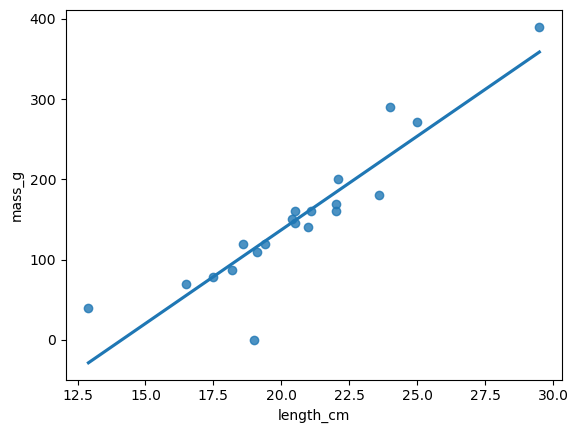

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x="length_cm",                
            y="mass_g",                    
            data=roach, 
            ci=None)
plt.show()


### Fit the model

In [20]:
from statsmodels.formula.api import ols

mdl_roach = ols("mass_g ~ length_cm", data=roach).fit()
mdl_roach.params

Intercept   -329.376211
length_cm     23.319264
dtype: float64

### Predict within a DataFrame

In [41]:
import numpy as np

explanatory_data = pd.DataFrame({"length_cm" : np.arange(12.5, 31, 2.5)})

prediction_data = explanatory_data.assign(mass_g=mdl_roach.predict(explanatory_data))
prediction_data

,length_cm,mass_g
0,12.5,-37.885408
1,15.0,20.412753
2,17.5,78.710914
3,20.0,137.009075
4,22.5,195.307235
5,25.0,253.605396
6,27.5,311.903557
7,30.0,370.201717


### Plot the fitted data with the observed data

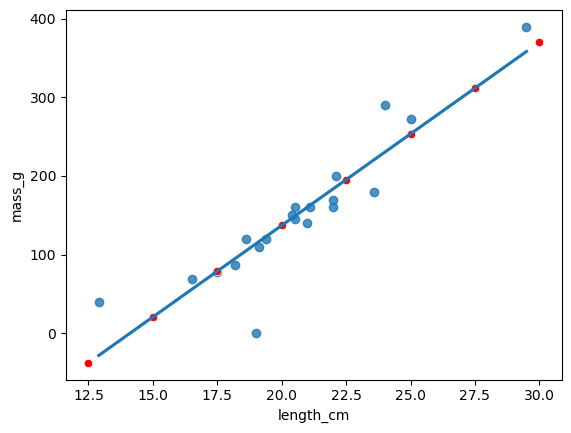

In [42]:
fig = plt.figure

sns.regplot(x="length_cm",                
            y="mass_g",                    
            data=roach, 
            ci=None)


sns.scatterplot(x="length_cm",                
            y="mass_g",                    
            data=prediction_data, 
            color="red")

plt.show()

### Summary Statistics

In [43]:
mdl_roach.params

Intercept   -329.376211
length_cm     23.319264
dtype: float64

In [44]:
mdl_roach.fittedvalues

35    -28.557702
36     55.391650
37     78.710914
38     95.034399
39    104.362105
40    113.689810
41    116.021737
42    123.017516
43    146.336780
44    148.668707
45    148.668707
46    160.328339
47    162.660265
48    183.647603
49    183.647603
50    185.979530
51    220.958426
52    230.286132
53    253.605396
54    358.542085
dtype: float64

In [45]:
mdl_roach.resid

35     68.557702
36     13.608350
37     -0.710914
38     -8.034399
39     15.637895
40   -113.689810
41     -6.021737
42     -3.017516
43      3.663220
44     -3.668707
45     11.331293
46    -20.328339
47     -2.660265
48    -14.647603
49    -22.647603
50     14.020470
51    -40.958426
52     59.713868
53     18.394604
54     31.457915
dtype: float64

In [46]:
mdl_roach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 mass_g   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     84.86
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           3.11e-08
Time:                        15:15:49   Log-Likelihood:                -100.17
No. Observations:                  20   AIC:                             204.3
Df Residuals:                      18   BIC:                             206.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -329.3762     52.955     -6.220      0.000    -440.631    -218.122
length_cm     23.3193      2.531      9.212      0.000      18.001      28.638
==============================================================================
Omnibus:                       11.392   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.025
Skew:                          -1.030   Prob(JB):                      0.00404
Kurtosis:                       5.997   Cond. No.                         130.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""